# ASSIGNMENT 9

# Decision Tree 

IRIS DATASET

CRITERION = ENTROPY

In [1]:
#preparing the dataset
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
data = load_iris()
X_train,X_test,Y_train,Y_test = train_test_split(data['data'],data['target'],test_size = 0.2,random_state = 0)

In [2]:
#fitting the data using decision tree classifier
from sklearn.tree import DecisionTreeClassifier
clf_entropy = DecisionTreeClassifier(criterion = "entropy",random_state=100,max_depth = 3,min_samples_leaf = 5)
clf_entropy.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=100)

In [3]:
#predicting y
y_pred_en = clf_entropy.predict(X_test)
y_pred_en

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0])

In [4]:
#accuracy from sklearn
from sklearn.metrics import accuracy_score
Accuracy = accuracy_score(Y_test,y_pred_en)*100
Accuracy

100.0

In [5]:
#confusion matrix from scratch
import pandas as pd
Y_test1 = pd.Series(Y_test)
y_pred_en1 = pd.Series(y_pred_en)
cm = pd.crosstab(Y_test1,y_pred_en1)
cm

col_0,0,1,2
row_0,,,
0,11,0,0
1,0,13,0
2,0,0,6


Text(0.5, 63.222222222222186, 'Predicted label')

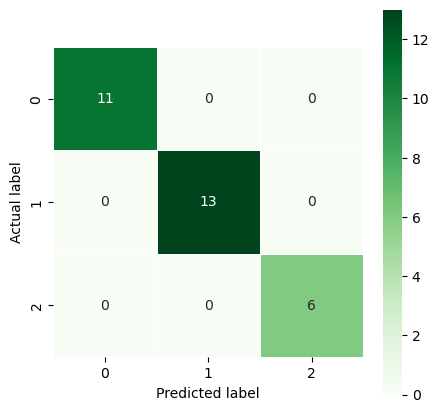

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (5,5))
sns.heatmap(cm,annot = True,linewidths = 0.5,square = True,cmap = 'Greens')
plt.ylabel("Actual label")
plt.xlabel("Predicted label")

In [7]:
#accuracy,precision,recall, f1_score from scratch
def regression_metrics(y,y_pred):
    tp,tn,fp,fn = 0,0,0,0
    for j in np.unique(y):
        for i in range(len(y)):
            if y[i]==j and y_pred[i]==j:
                tp+=1
            elif y[i]==j and y_pred[i]!=j:
                fn+=1
            elif y[i]!=j and y_pred[i]==j:
                fp+=1
            elif y[i]!=j and y_pred[i]!=j:
                tn+=1
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    f1_score = 2*precision*recall/(precision+recall)
    accuracy = tp/len(y)
    return f"f1_score = {f1_score}, recall = {recall}, precision = {precision},accuracy = {accuracy}" 
regression_metrics(Y_test,y_pred_en)

'f1_score = 1.0, recall = 1.0, precision = 1.0,accuracy = 1.0'

In [8]:
#accuracy,precision,recall, f1_score from sklearn
from sklearn import metrics
print(metrics.classification_report(Y_test,y_pred_en))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



[Text(0.375, 0.875, 'x[2] <= 2.35\nentropy = 1.581\nsamples = 120\nvalue = [39, 37, 44]'),
 Text(0.25, 0.625, 'entropy = 0.0\nsamples = 39\nvalue = [39, 0, 0]'),
 Text(0.5, 0.625, 'x[3] <= 1.75\nentropy = 0.995\nsamples = 81\nvalue = [0, 37, 44]'),
 Text(0.25, 0.375, 'x[2] <= 4.95\nentropy = 0.469\nsamples = 40\nvalue = [0, 36, 4]'),
 Text(0.125, 0.125, 'entropy = 0.187\nsamples = 35\nvalue = [0, 34, 1]'),
 Text(0.375, 0.125, 'entropy = 0.971\nsamples = 5\nvalue = [0, 2, 3]'),
 Text(0.75, 0.375, 'x[0] <= 5.95\nentropy = 0.165\nsamples = 41\nvalue = [0, 1, 40]'),
 Text(0.625, 0.125, 'entropy = 0.722\nsamples = 5\nvalue = [0, 1, 4]'),
 Text(0.875, 0.125, 'entropy = 0.0\nsamples = 36\nvalue = [0, 0, 36]')]

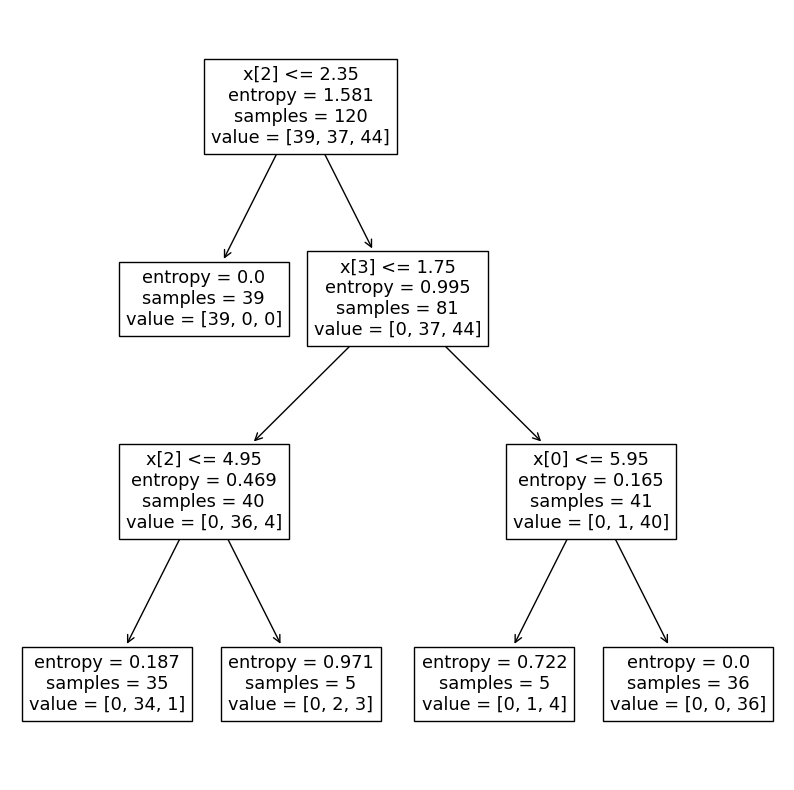

In [9]:
#plotting the decision tree 
from sklearn import tree
plt.figure(figsize = (10,10))
tree.plot_tree(clf_entropy)

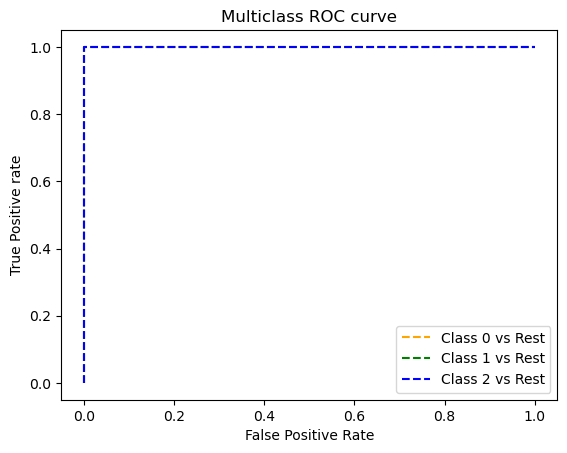

In [10]:
#plot of auc roc curve
from sklearn.metrics import roc_curve
pred_prob = clf_entropy.predict_proba(X_test)
fpr1, tpr1, thresh1 = roc_curve(Y_test, pred_prob[:,1], pos_label=1)
fpr = {}
tpr = {}
thresh ={}

n_class = 3

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(Y_test, pred_prob[:,i], pos_label=i)
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

CRITERION = GINI INDEX

In [11]:
#fitting the data using decision tree classifier
from sklearn.tree import DecisionTreeClassifier
clf_gini = DecisionTreeClassifier(criterion = "gini",random_state=100,max_depth = 3,min_samples_leaf = 5)
clf_gini.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=100)

In [12]:
#predicting y
y_pred_en = clf_gini.predict(X_test)
y_pred_en

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0])

In [13]:
#accuracy from sklearn
from sklearn.metrics import accuracy_score
Accuracy_1 = accuracy_score(Y_test,y_pred_en)*100
Accuracy_1

100.0

In [14]:
#confusion matrix from scratch
import pandas as pd
Y_test1 = pd.Series(Y_test)
y_pred_en1 = pd.Series(y_pred_en)
cm_1 = pd.crosstab(Y_test1,y_pred_en1)
cm_1

col_0,0,1,2
row_0,,,
0,11,0,0
1,0,13,0
2,0,0,6


Text(0.5, 63.222222222222186, 'Predicted label')

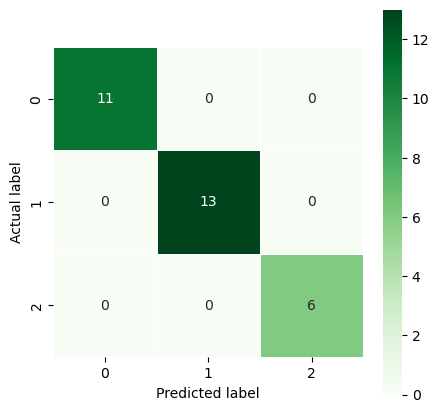

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (5,5))
sns.heatmap(cm_1,annot = True,linewidths = 0.5,square = True,cmap = 'Greens')
plt.ylabel("Actual label")
plt.xlabel("Predicted label")

In [16]:
#accuracy,precision,recall, f1_score from scratch
def regression_metrics(y,y_pred):
    tp,tn,fp,fn = 0,0,0,0
    for j in np.unique(y):
        for i in range(len(y)):
            if y[i]==j and y_pred[i]==j:
                tp+=1
            elif y[i]==j and y_pred[i]!=j:
                fn+=1
            elif y[i]!=j and y_pred[i]==j:
                fp+=1
            elif y[i]!=j and y_pred[i]!=j:
                tn+=1
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    f1_score = 2*precision*recall/(precision+recall)
    accuracy = tp/len(y)
    return f"f1_score = {f1_score}, recall = {recall}, precision = {precision},accuracy = {accuracy}" 
regression_metrics(Y_test,y_pred_en)

'f1_score = 1.0, recall = 1.0, precision = 1.0,accuracy = 1.0'

In [17]:
#accuracy,precision,recall, f1_score from sklearn
from sklearn import metrics
print(metrics.classification_report(Y_test,y_pred_en))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



[Text(0.375, 0.875, 'x[2] <= 2.35\ngini = 0.665\nsamples = 120\nvalue = [39, 37, 44]'),
 Text(0.25, 0.625, 'gini = 0.0\nsamples = 39\nvalue = [39, 0, 0]'),
 Text(0.5, 0.625, 'x[3] <= 1.75\ngini = 0.496\nsamples = 81\nvalue = [0, 37, 44]'),
 Text(0.25, 0.375, 'x[2] <= 4.95\ngini = 0.18\nsamples = 40\nvalue = [0, 36, 4]'),
 Text(0.125, 0.125, 'gini = 0.056\nsamples = 35\nvalue = [0, 34, 1]'),
 Text(0.375, 0.125, 'gini = 0.48\nsamples = 5\nvalue = [0, 2, 3]'),
 Text(0.75, 0.375, 'x[0] <= 5.95\ngini = 0.048\nsamples = 41\nvalue = [0, 1, 40]'),
 Text(0.625, 0.125, 'gini = 0.32\nsamples = 5\nvalue = [0, 1, 4]'),
 Text(0.875, 0.125, 'gini = 0.0\nsamples = 36\nvalue = [0, 0, 36]')]

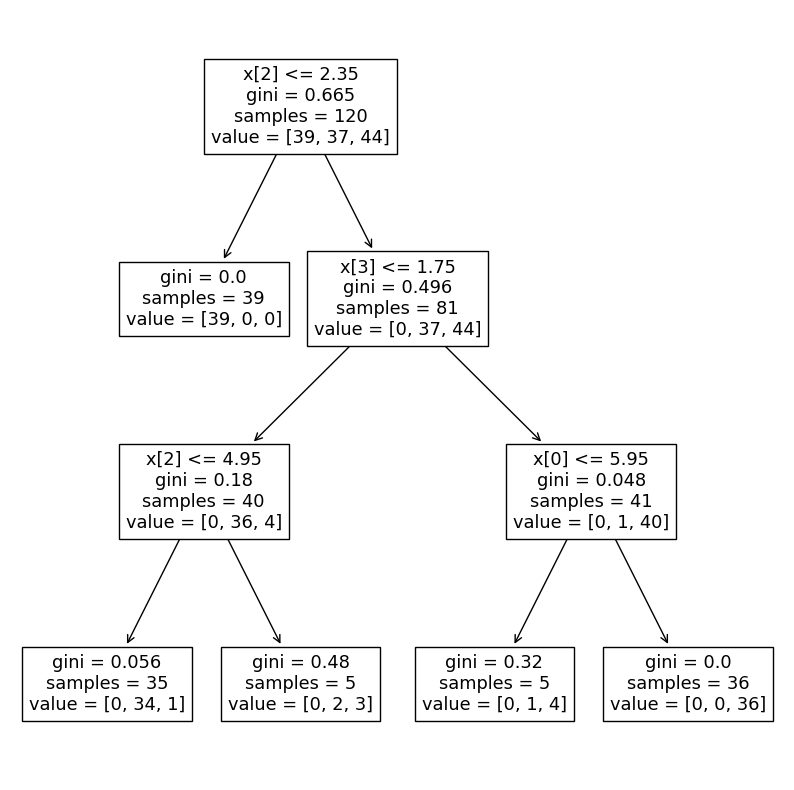

In [18]:
#plotting the decision tree 
from sklearn import tree
plt.figure(figsize = (10,10))
tree.plot_tree(clf_gini)

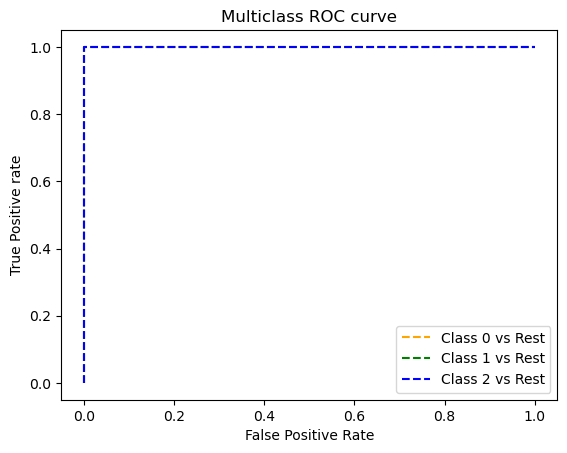

In [19]:
#plot of auc roc curve
from sklearn.metrics import roc_curve
pred_prob = clf_gini.predict_proba(X_test)
fpr1, tpr1, thresh1 = roc_curve(Y_test, pred_prob[:,1], pos_label=1)
fpr = {}
tpr = {}
thresh ={}

n_class = 3

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(Y_test, pred_prob[:,i], pos_label=i)
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

CRITERION = LOG LOSS

In [20]:
#fitting the data using decision tree classifier
from sklearn.tree import DecisionTreeClassifier
clf_logloss = DecisionTreeClassifier(criterion = "log_loss",random_state=100,max_depth = 3,min_samples_leaf = 5)
clf_logloss.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='log_loss', max_depth=3, min_samples_leaf=5,
                       random_state=100)

In [21]:
#predicting y
y_pred_en = clf_logloss.predict(X_test)
y_pred_en

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0])

In [22]:
#accuracy from sklearn
from sklearn.metrics import accuracy_score
Accuracy_2 = accuracy_score(Y_test,y_pred_en)*100
Accuracy_2

100.0

In [23]:
#confusion matrix from scratch
import pandas as pd
Y_test1 = pd.Series(Y_test)
y_pred_en1 = pd.Series(y_pred_en)
cm_2 = pd.crosstab(Y_test1,y_pred_en1)
cm_2

col_0,0,1,2
row_0,,,
0,11,0,0
1,0,13,0
2,0,0,6


Text(0.5, 63.222222222222186, 'Predicted label')

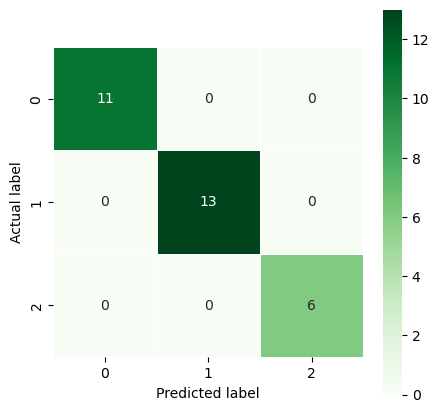

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (5,5))
sns.heatmap(cm_2,annot = True,linewidths = 0.5,square = True,cmap = 'Greens')
plt.ylabel("Actual label")
plt.xlabel("Predicted label")

In [25]:
#accuracy,precision,recall, f1_score from scratch
def regression_metrics(y,y_pred):
    tp,tn,fp,fn = 0,0,0,0
    for j in np.unique(y):
        for i in range(len(y)):
            if y[i]==j and y_pred[i]==j:
                tp+=1
            elif y[i]==j and y_pred[i]!=j:
                fn+=1
            elif y[i]!=j and y_pred[i]==j:
                fp+=1
            elif y[i]!=j and y_pred[i]!=j:
                tn+=1
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    f1_score = 2*precision*recall/(precision+recall)
    accuracy = tp/len(y)
    return f"f1_score = {f1_score}, recall = {recall}, precision = {precision},accuracy = {accuracy}" 
regression_metrics(Y_test,y_pred_en)

'f1_score = 1.0, recall = 1.0, precision = 1.0,accuracy = 1.0'

In [26]:
#accuracy,precision,recall, f1_score from sklearn
from sklearn import metrics
print(metrics.classification_report(Y_test,y_pred_en))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



[Text(0.375, 0.875, 'x[2] <= 2.35\nlog_loss = 1.581\nsamples = 120\nvalue = [39, 37, 44]'),
 Text(0.25, 0.625, 'log_loss = 0.0\nsamples = 39\nvalue = [39, 0, 0]'),
 Text(0.5, 0.625, 'x[3] <= 1.75\nlog_loss = 0.995\nsamples = 81\nvalue = [0, 37, 44]'),
 Text(0.25, 0.375, 'x[2] <= 4.95\nlog_loss = 0.469\nsamples = 40\nvalue = [0, 36, 4]'),
 Text(0.125, 0.125, 'log_loss = 0.187\nsamples = 35\nvalue = [0, 34, 1]'),
 Text(0.375, 0.125, 'log_loss = 0.971\nsamples = 5\nvalue = [0, 2, 3]'),
 Text(0.75, 0.375, 'x[0] <= 5.95\nlog_loss = 0.165\nsamples = 41\nvalue = [0, 1, 40]'),
 Text(0.625, 0.125, 'log_loss = 0.722\nsamples = 5\nvalue = [0, 1, 4]'),
 Text(0.875, 0.125, 'log_loss = 0.0\nsamples = 36\nvalue = [0, 0, 36]')]

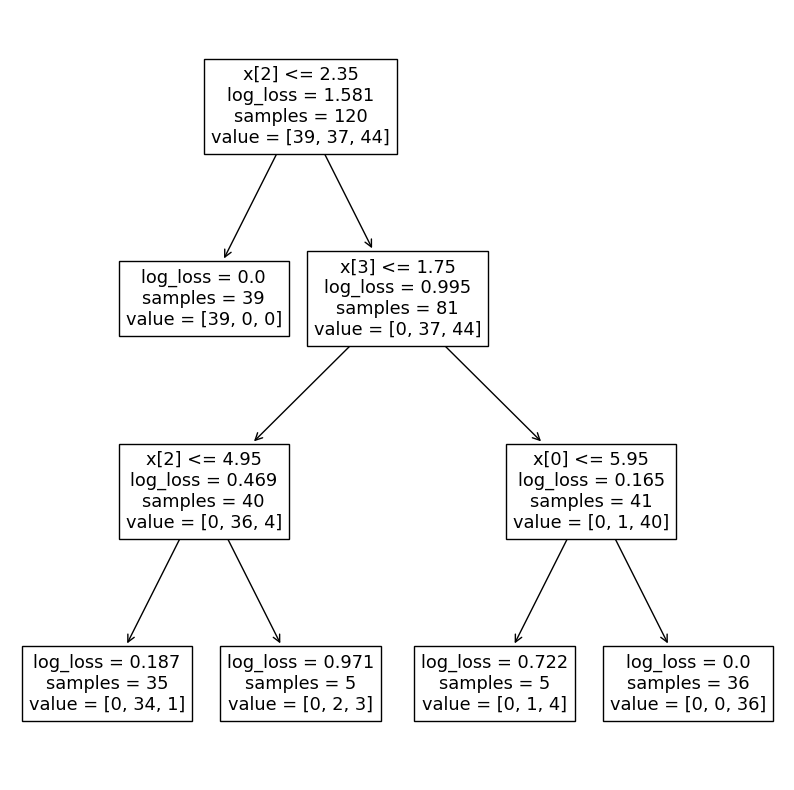

In [27]:
#plotting the decision tree 
from sklearn import tree
plt.figure(figsize = (10,10))
tree.plot_tree(clf_logloss)

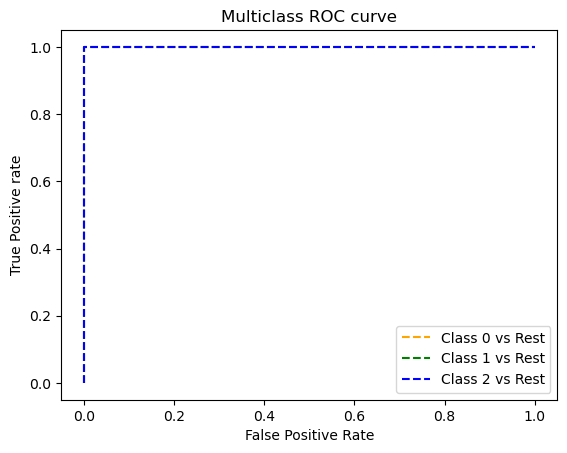

In [28]:
#plot of auc roc curve
from sklearn.metrics import roc_curve
pred_prob = clf_logloss.predict_proba(X_test)
fpr1, tpr1, thresh1 = roc_curve(Y_test, pred_prob[:,1], pos_label=1)
fpr = {}
tpr = {}
thresh ={}

n_class = 3

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(Y_test, pred_prob[:,i], pos_label=i)
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

MNIST DATASET

CRITERION = ENTROPY

In [29]:
#preparing the dataset
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
mnist = fetch_openml('mnist_784',version = 1)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(mnist['data'],mnist['target'],test_size = 0.3,random_state = 0)

C:\Users\naren\anaconda3\lib\site-packages\sklearn\datasets\_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [30]:
#classification using dicision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
clf_entropy_1 = DecisionTreeClassifier(criterion = "entropy",random_state=100,max_depth = 10,min_samples_leaf = 5)
clf_entropy_1.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=5,
                       random_state=100)

In [31]:
#predicting y 
y_pred = clf_entropy_1.predict(x_test)
y_pred

array(['6', '5', '1', ..., '9', '0', '1'], dtype=object)

In [32]:
#accuracy from sklearn
from sklearn.metrics import accuracy_score
Accuracy_1 = accuracy_score(y_test,y_pred)*100
Accuracy_1

87.05238095238094

In [33]:
#confusion matrix from scratch
import pandas as pd
y_test1 = pd.Series(y_test)
y_pred1 = pd.Series(y_pred)
cm_1 = pd.crosstab(y_test1,y_pred1)
cm_1

col_0,0,1,2,3,4,5,6,7,8,9
class,,,,,,,,,,
0,54,63,60,70,63,49,57,66,47,71
1,64,91,97,71,64,76,76,76,62,69
2,53,65,67,67,62,53,52,69,56,61
3,61,74,66,74,56,53,61,74,70,69
4,51,69,60,56,62,74,63,69,61,55
5,61,66,49,53,61,35,52,43,51,55
6,53,69,52,72,49,60,49,59,58,61
7,66,91,68,59,56,50,55,71,55,51
8,60,68,51,59,58,52,57,74,57,56


Text(0.5, 100.22222222222219, 'Predicted label')

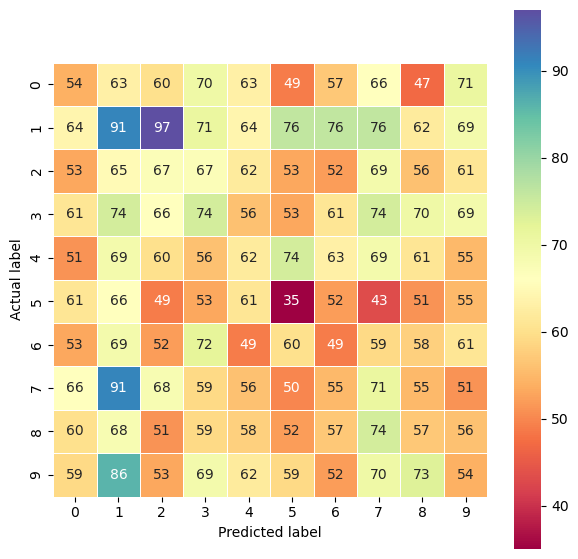

In [34]:

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (7,7))
sns.heatmap(cm_1,annot = True,linewidths = 0.5,square = True,cmap = 'Spectral')
plt.ylabel("Actual label")
plt.xlabel("Predicted label")

In [35]:
#precision,recall, f1_score, accuracy from scratch
def regression_metrics(y,y_pred):
    y= np.array(y)
    y_pred=np.array(y_pred)
    tp,tn,fp,fn = 0,0,0,0
    for j in np.unique(y):
        for i in range(len(y)):
            if y[i]==j and y_pred[i]==j:
                tp+=1
            elif y[i]==j and y_pred[i]!=j:
                fn+=1
            elif y[i]!=j and y_pred[i]==j:
                fp+=1
            elif y[i]!=j and y_pred[i]!=j:
                tn+=1
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    f1_score = 2*precision*recall/(precision+recall)
    return f"f1_score = {f1_score}, recall = {recall}, precision = {precision}" 
regression_metrics(y_test,y_pred)

'f1_score = 0.8705238095238095, recall = 0.8705238095238095, precision = 0.8705238095238095'

In [36]:
from sklearn import metrics
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      2077
           1       0.94      0.96      0.95      2385
           2       0.86      0.86      0.86      2115
           3       0.84      0.81      0.83      2117
           4       0.86      0.86      0.86      2004
           5       0.81      0.82      0.82      1900
           6       0.88      0.90      0.89      2045
           7       0.90      0.90      0.90      2189
           8       0.84      0.81      0.82      2042
           9       0.84      0.83      0.83      2126

    accuracy                           0.87     21000
   macro avg       0.87      0.87      0.87     21000
weighted avg       0.87      0.87      0.87     21000



[Text(0.4691336743772242, 0.9545454545454546, 'x[461] <= 1.5\nentropy = 3.32\nsamples = 49000\nvalue = [4826, 5492, 4875, 5024, 4820, 4413, 4831, 5104, 4783\n4832]'),
 Text(0.21343972419928825, 0.8636363636363636, 'x[378] <= 9.5\nentropy = 2.882\nsamples = 19127\nvalue = [4664, 173, 716, 3483, 753, 2704, 1213, 3433, 452\n1536]'),
 Text(0.10577179715302491, 0.7727272727272727, 'x[597] <= 2.5\nentropy = 2.154\nsamples = 10009\nvalue = [4384, 24, 428, 264, 213, 464, 724, 3222, 14, 272]'),
 Text(0.05062277580071174, 0.6818181818181818, 'x[514] <= 4.5\nentropy = 1.802\nsamples = 4631\nvalue = [373, 8, 90, 46, 201, 134, 456, 3060, 10, 253]'),
 Text(0.029626334519572955, 0.5909090909090909, 'x[623] <= 16.5\nentropy = 0.982\nsamples = 3515\nvalue = [147, 8, 38, 36, 67, 78, 22, 3009, 4, 106]'),
 Text(0.019217081850533807, 0.5, 'x[433] <= 2.5\nentropy = 0.715\nsamples = 3328\nvalue = [14, 8, 36, 19, 67, 45, 22, 3007, 4, 106]'),
 Text(0.010854092526690392, 0.4090909090909091, 'x[153] <= 11.5\nent

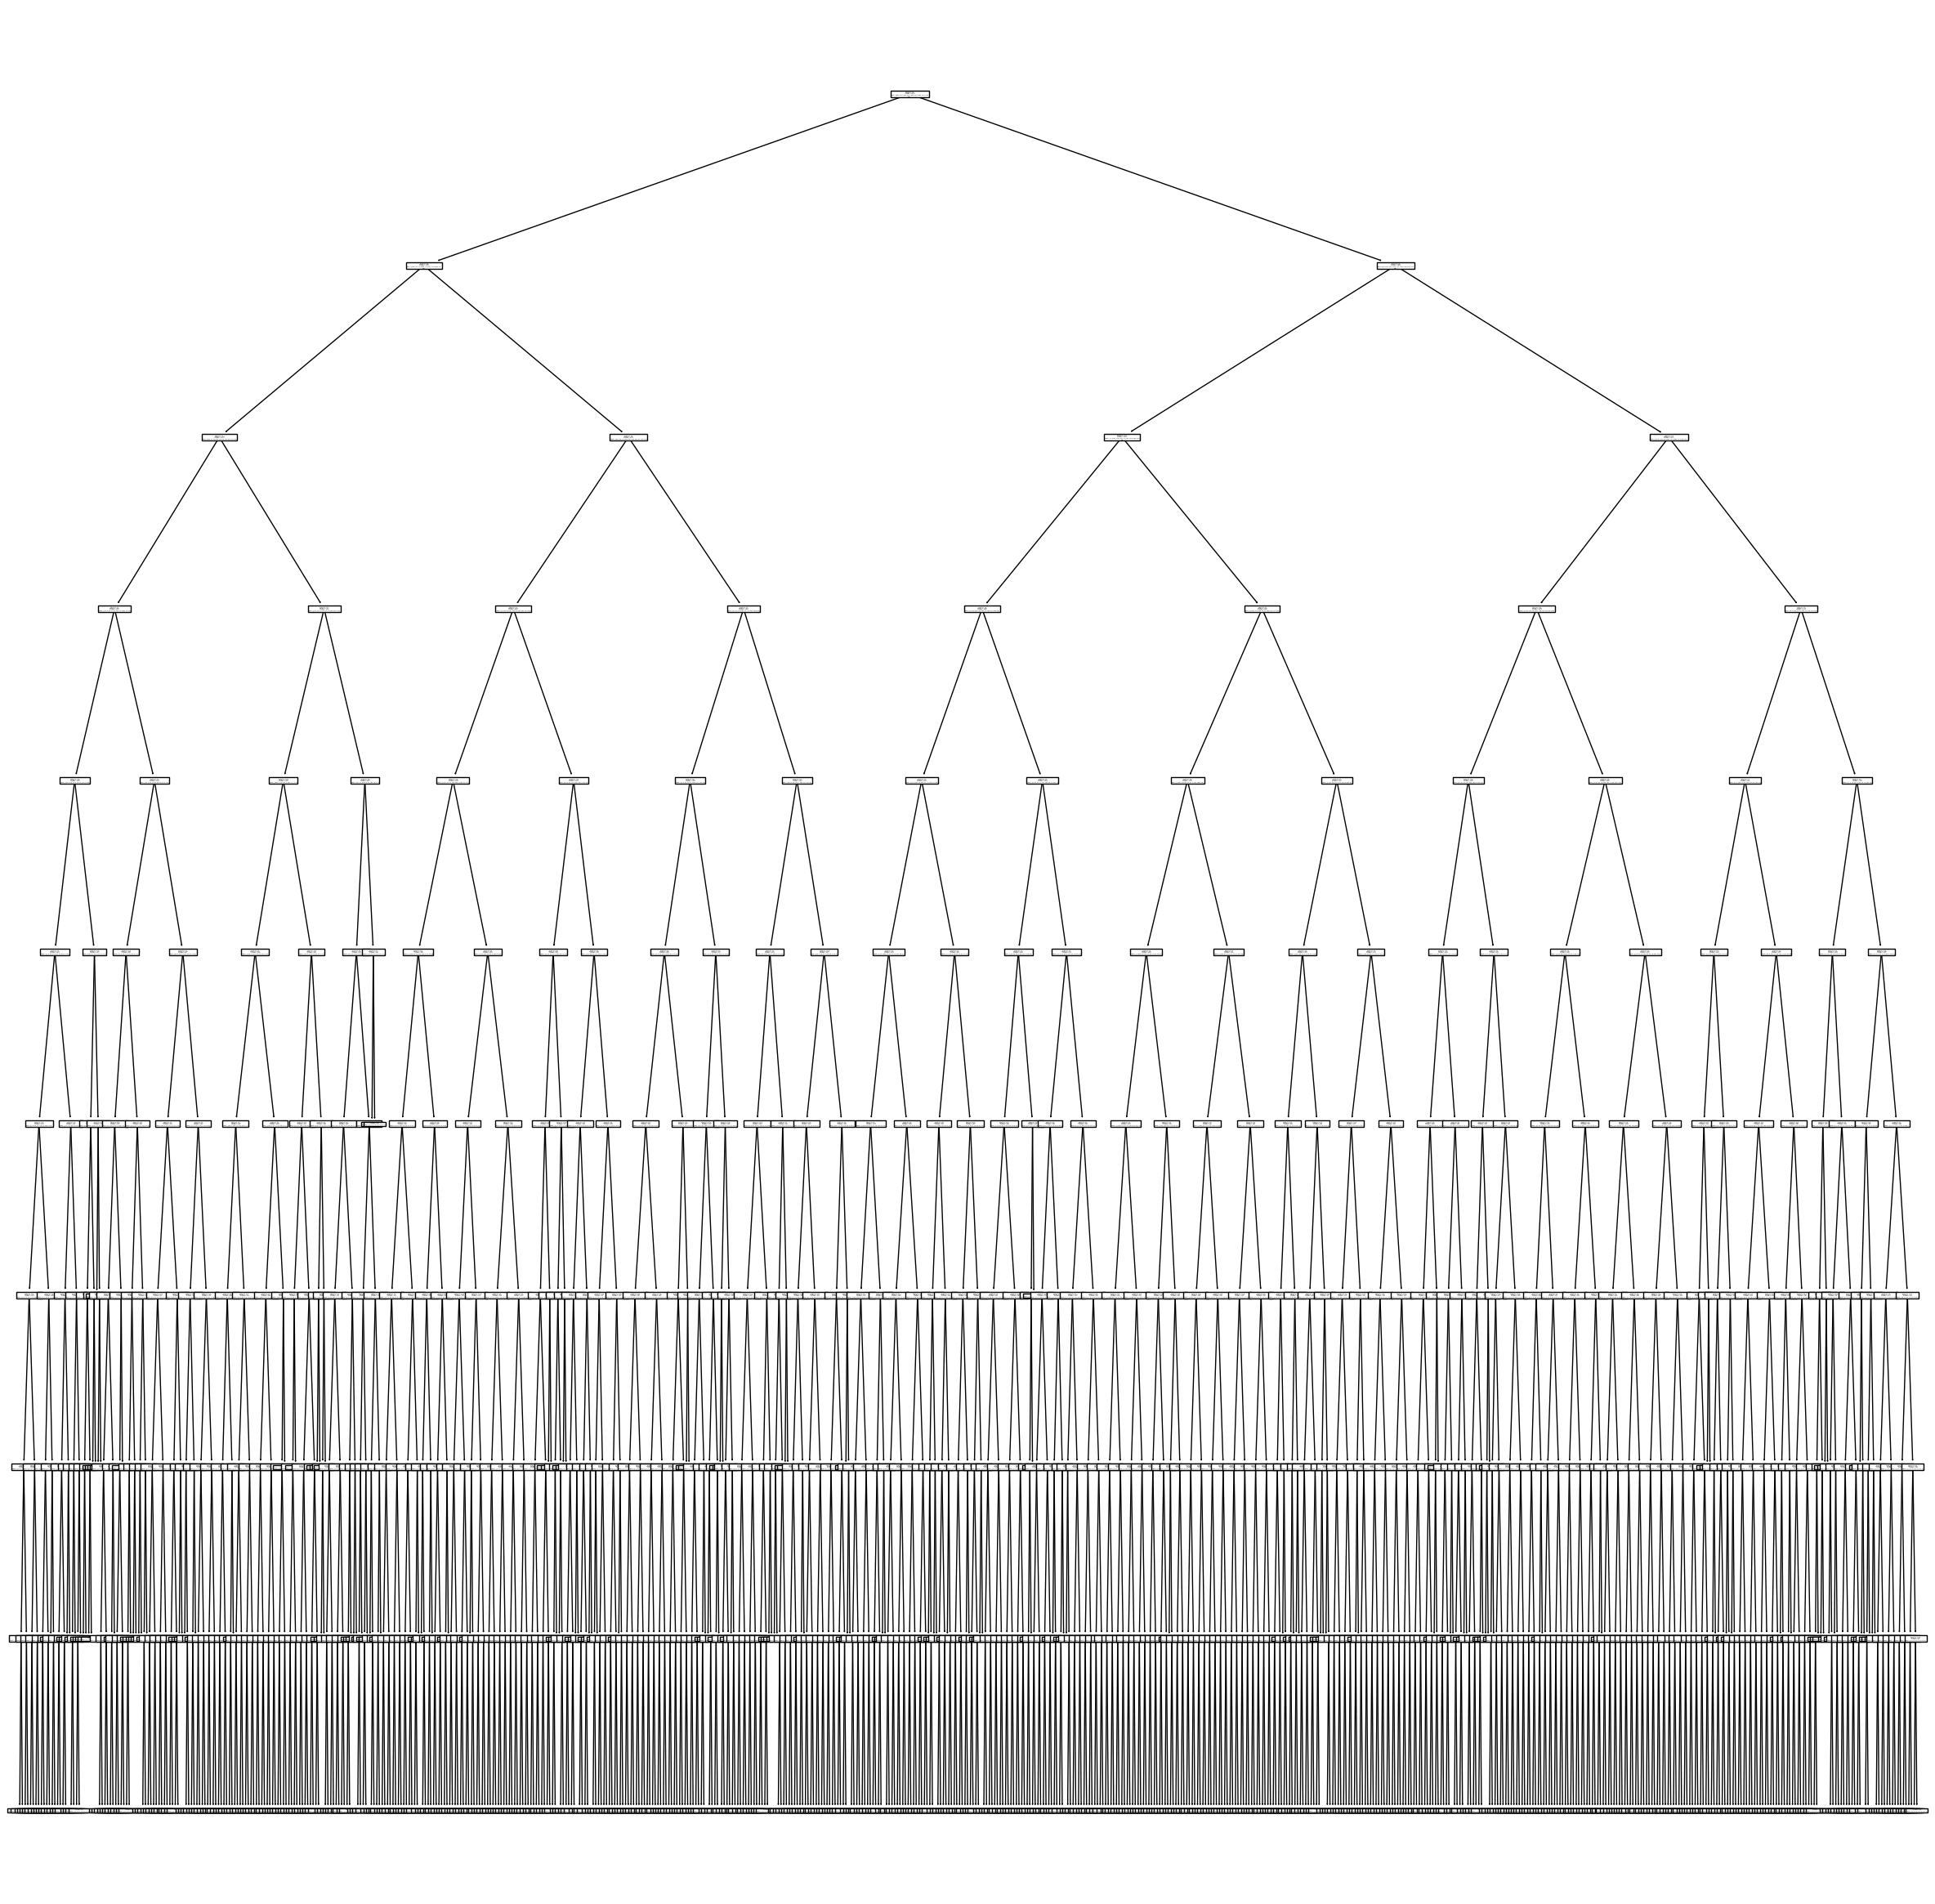

In [37]:
#plot the decision tree
from sklearn import tree
plt.figure(figsize = (30,30))
tree.plot_tree(clf_entropy_1)

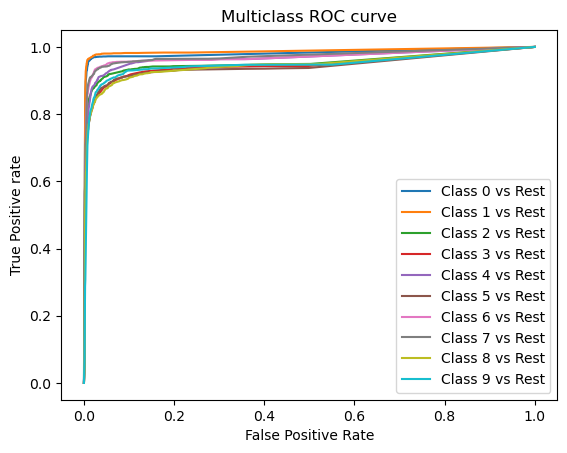

In [38]:
#plot of auc roc curve
from sklearn.metrics import roc_curve
y_test_Int = np.array(y_test,dtype = 'int')
pred_prob = clf_entropy_1.predict_proba(x_test)
fpr = {}
tpr = {}
thresh ={}

n_class = 10

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_Int, pred_prob[:,i], pos_label=i)
# plotting
for i in range(n_class):
    plt.plot(fpr[i], tpr[i], linestyle='-',label=f'Class {i} vs Rest')

plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

CRITERION = GINI INDEX

In [39]:
#classification using dicision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
clf_gini_1 = DecisionTreeClassifier(criterion = "gini",random_state=100,max_depth = 10,min_samples_leaf = 5)
clf_gini_1.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=100)

In [40]:
#predicting y 
y_pred = clf_gini_1.predict(x_test)
y_pred

array(['8', '4', '1', ..., '9', '0', '1'], dtype=object)

In [41]:
#accuracy from sklearn
from sklearn.metrics import accuracy_score
Accuracy_2 = accuracy_score(y_test,y_pred)*100
Accuracy_2

85.36190476190477

In [42]:
#confusion matrix from scratch
import pandas as pd
y_test1 = pd.Series(y_test)
y_pred1 = pd.Series(y_pred)
cm_2 = pd.crosstab(y_test1,y_pred1)
cm_2

col_0,0,1,2,3,4,5,6,7,8,9
class,,,,,,,,,,
0,56,63,52,72,63,48,53,71,56,66
1,61,90,85,78,69,68,71,82,78,64
2,53,66,64,65,49,59,47,69,60,73
3,67,74,72,73,52,50,57,78,67,68
4,50,71,67,62,67,57,55,66,63,62
5,57,63,51,59,51,34,53,41,57,60
6,47,65,59,67,43,62,48,58,64,69
7,65,91,73,67,45,48,52,73,59,49
8,57,68,52,57,49,60,52,75,58,64


Text(0.5, 100.22222222222219, 'Predicted label')

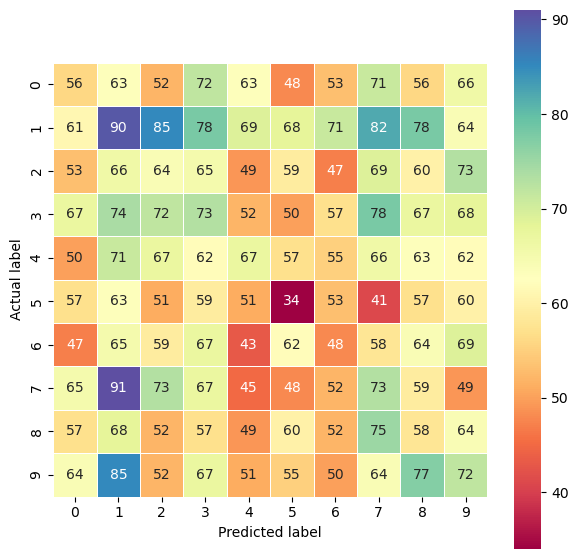

In [43]:

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (7,7))
sns.heatmap(cm_2,annot = True,linewidths = 0.5,square = True,cmap = 'Spectral')
plt.ylabel("Actual label")
plt.xlabel("Predicted label")

In [44]:
#precision,recall, f1_score, accuracy from scratch
def regression_metrics(y,y_pred):
    y= np.array(y)
    y_pred=np.array(y_pred)
    tp,tn,fp,fn = 0,0,0,0
    for j in np.unique(y):
        for i in range(len(y)):
            if y[i]==j and y_pred[i]==j:
                tp+=1
            elif y[i]==j and y_pred[i]!=j:
                fn+=1
            elif y[i]!=j and y_pred[i]==j:
                fp+=1
            elif y[i]!=j and y_pred[i]!=j:
                tn+=1
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    f1_score = 2*precision*recall/(precision+recall)
    return f"f1_score = {f1_score}, recall = {recall}, precision = {precision}" 
regression_metrics(y_test,y_pred)

'f1_score = 0.8536190476190476, recall = 0.8536190476190476, precision = 0.8536190476190476'

In [45]:
from sklearn import metrics
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.91      0.92      2077
           1       0.94      0.95      0.94      2385
           2       0.84      0.86      0.85      2115
           3       0.82      0.80      0.81      2117
           4       0.87      0.82      0.85      2004
           5       0.79      0.78      0.79      1900
           6       0.91      0.87      0.89      2045
           7       0.87      0.88      0.88      2189
           8       0.77      0.81      0.79      2042
           9       0.79      0.83      0.81      2126

    accuracy                           0.85     21000
   macro avg       0.85      0.85      0.85     21000
weighted avg       0.85      0.85      0.85     21000



[Text(0.5242585180623974, 0.9545454545454546, 'x[350] <= 125.5\ngini = 0.9\nsamples = 49000\nvalue = [4826, 5492, 4875, 5024, 4820, 4413, 4831, 5104, 4783\n4832]'),
 Text(0.2704164100985222, 0.8636363636363636, 'x[568] <= 0.5\ngini = 0.88\nsamples = 31575\nvalue = [4420, 448, 3875, 1028, 4356, 2610, 3879, 4688, 2435\n3836]'),
 Text(0.1487838669950739, 0.7727272727272727, 'x[430] <= 0.5\ngini = 0.838\nsamples = 19475\nvalue = [562, 298, 767, 646, 4171, 1340, 2241, 4529, 1180\n3741]'),
 Text(0.07963875205254516, 0.6818181818181818, 'x[405] <= 3.5\ngini = 0.706\nsamples = 7899\nvalue = [215, 290, 479, 330, 435, 410, 259, 4057, 705, 719]'),
 Text(0.03797208538587849, 0.5909090909090909, 'x[485] <= 7.0\ngini = 0.482\nsamples = 5524\nvalue = [209, 49, 339, 81, 290, 75, 134, 3921, 19, 407]'),
 Text(0.01990968801313629, 0.5, 'x[154] <= 1.0\ngini = 0.265\nsamples = 4466\nvalue = [145, 49, 254, 72, 9, 57, 11, 3816, 13, 40]'),
 Text(0.011083743842364532, 0.4090909090909091, 'x[594] <= 2.5\ngini =

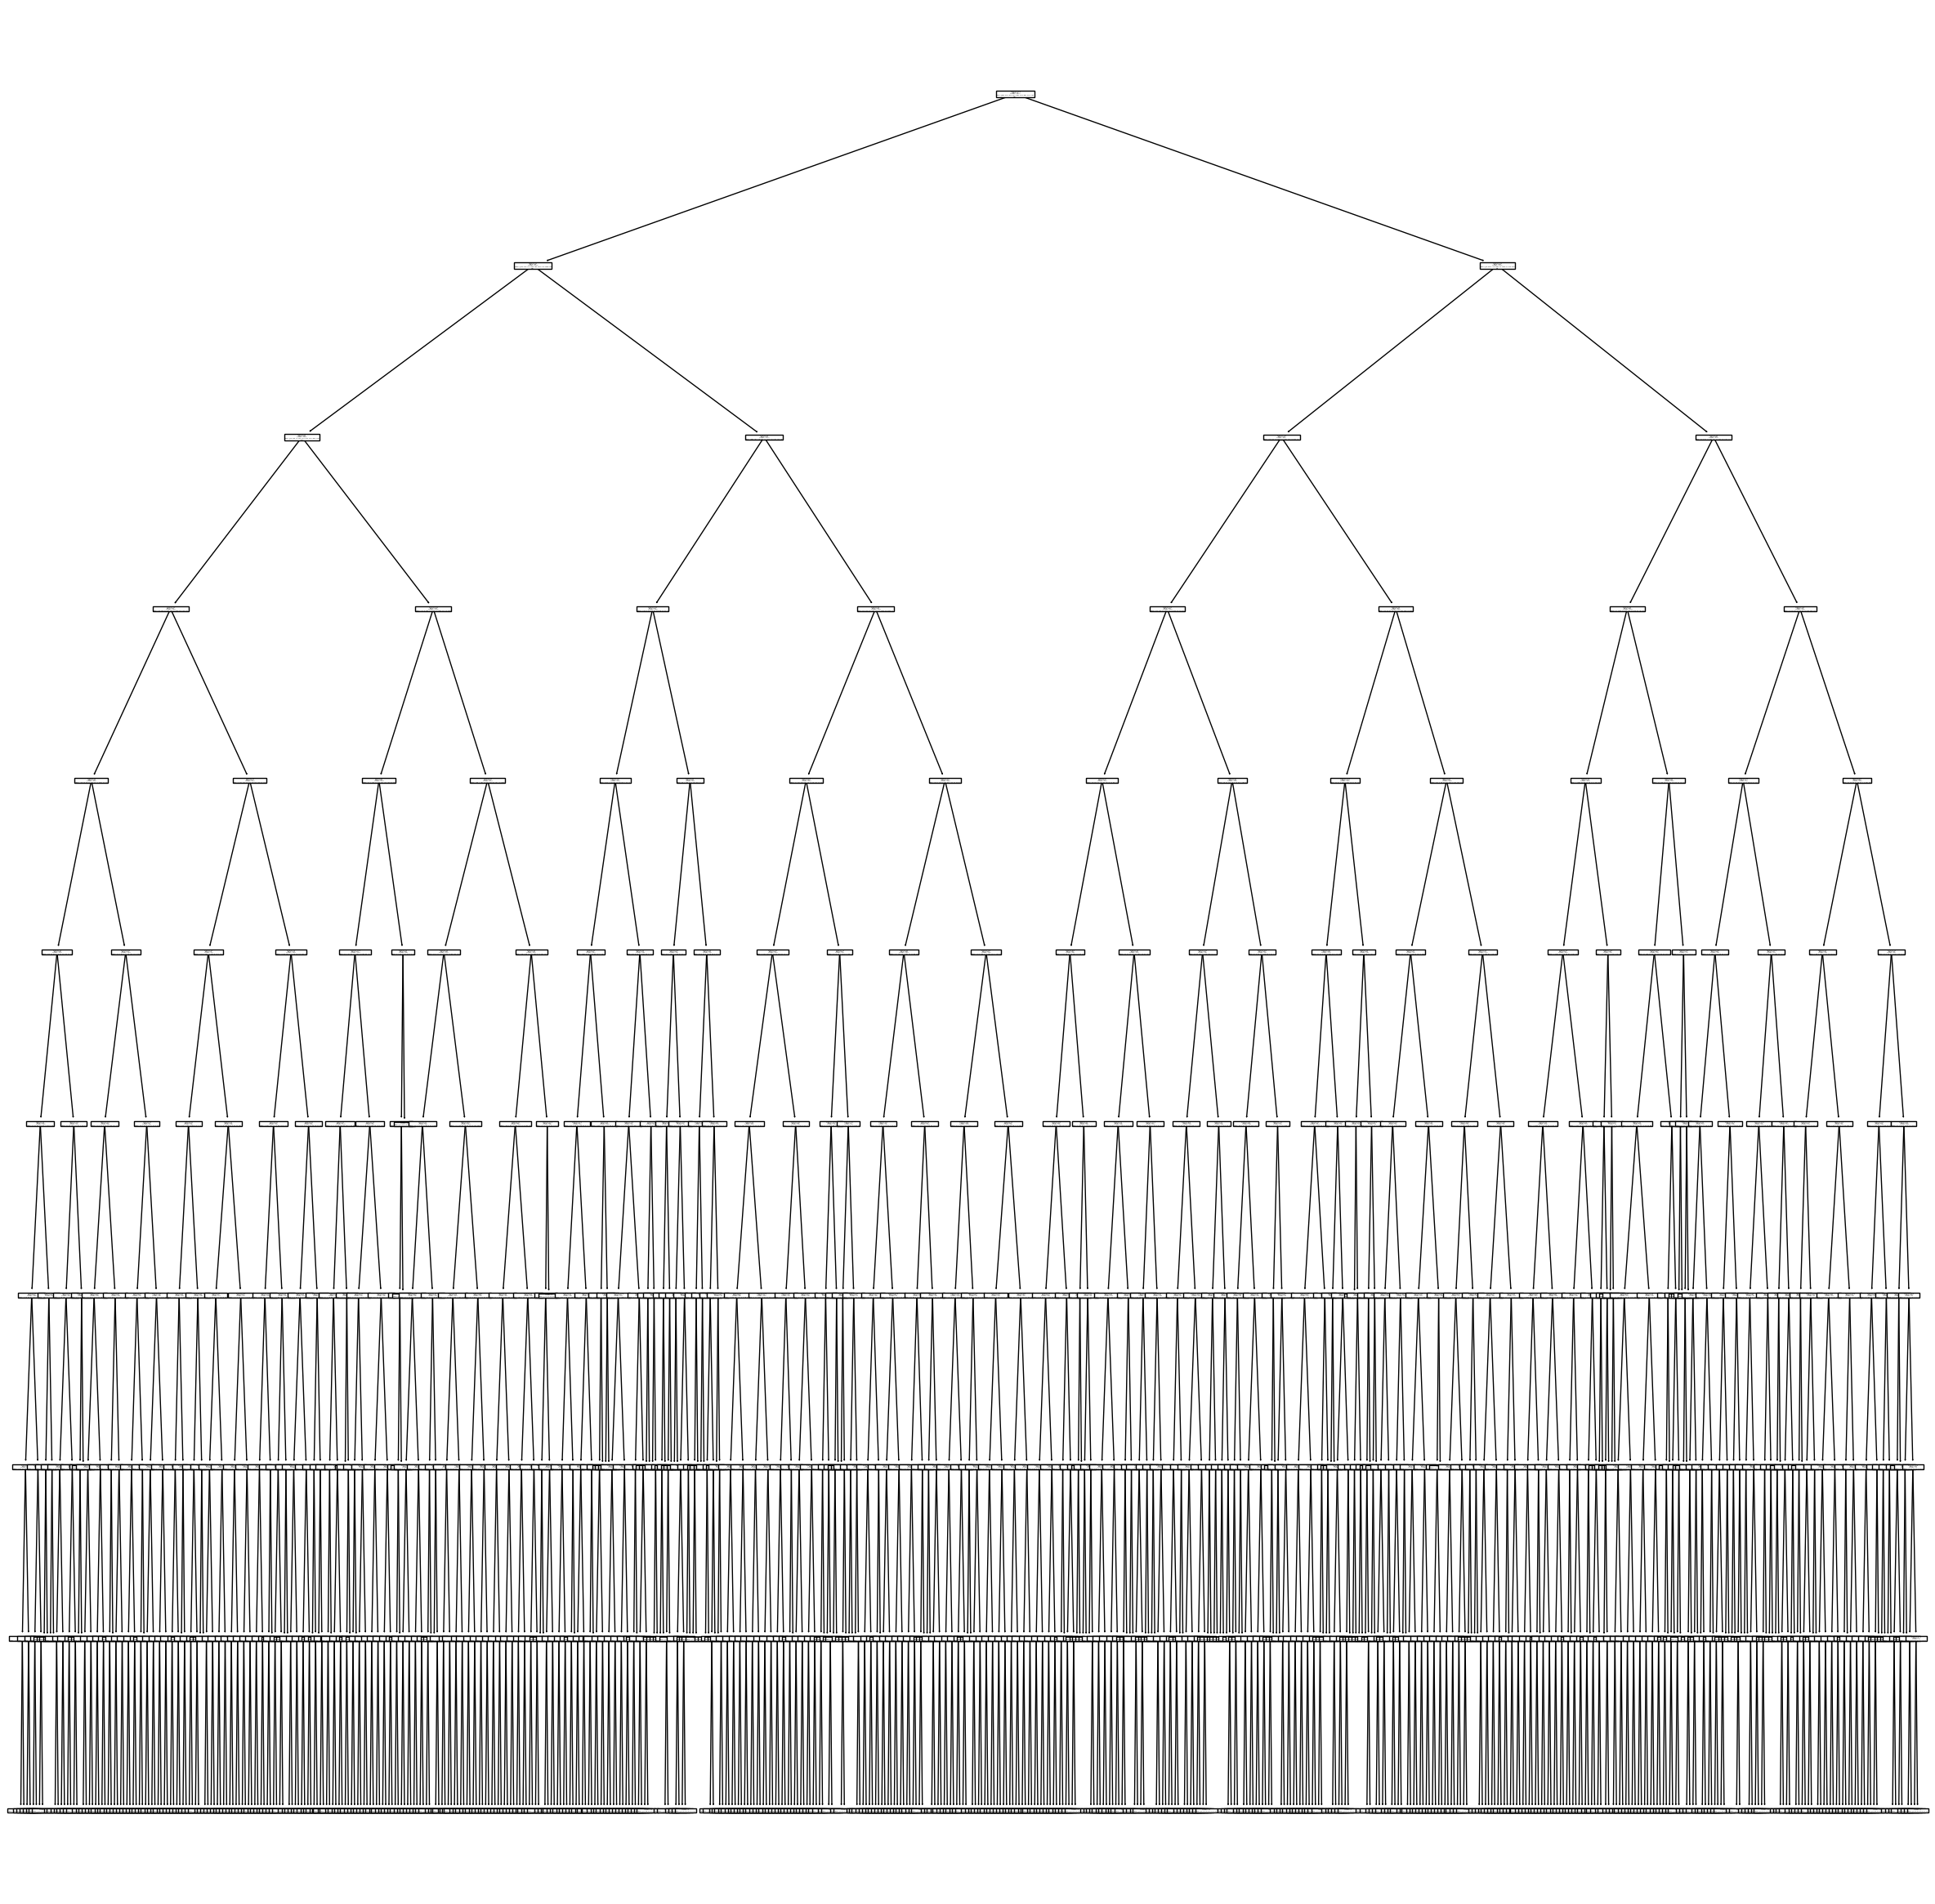

In [46]:
#plot the decision tree
from sklearn import tree
plt.figure(figsize = (30,30))
tree.plot_tree(clf_gini_1)

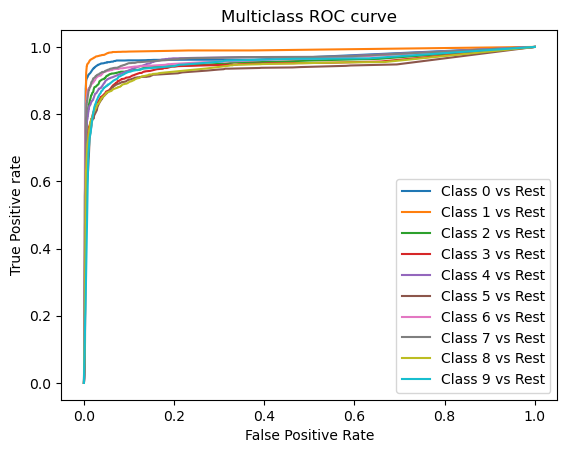

In [47]:
#plot of auc roc curve
from sklearn.metrics import roc_curve
y_test_int = np.array(y_test,dtype = 'int')
pred_prob = clf_gini_1.predict_proba(x_test)
fpr = {}
tpr = {}
thresh ={}

n_class = 10

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_int, pred_prob[:,i], pos_label=i)
# plotting
for i in range(n_class):
    plt.plot(fpr[i], tpr[i], linestyle='-',label=f'Class {i} vs Rest')

plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

CRITERION = LOG LOSS

In [48]:
#classification using dicision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
clf_logloss_1 = DecisionTreeClassifier(criterion = "log_loss",random_state=100,max_depth = 10,min_samples_leaf = 5)
clf_logloss_1.fit(x_train,y_train)

DecisionTreeClassifier(criterion='log_loss', max_depth=10, min_samples_leaf=5,
                       random_state=100)

In [49]:
#predicting y 
y_pred = clf_logloss_1.predict(x_test)
y_pred

array(['6', '5', '1', ..., '9', '0', '1'], dtype=object)

In [50]:
#accuracy from sklearn
from sklearn.metrics import accuracy_score
Accuracy_3 = accuracy_score(y_test,y_pred)*100
Accuracy_3

87.05238095238094

In [51]:
#confusion matrix from scratch
import pandas as pd
y_test1 = pd.Series(y_test)
y_pred1 = pd.Series(y_pred)
cm_3 = pd.crosstab(y_test1,y_pred1)
cm_3

col_0,0,1,2,3,4,5,6,7,8,9
class,,,,,,,,,,
0,54,63,60,70,63,49,57,66,47,71
1,64,91,97,71,64,76,76,76,62,69
2,53,65,67,67,62,53,52,69,56,61
3,61,74,66,74,56,53,61,74,70,69
4,51,69,60,56,62,74,63,69,61,55
5,61,66,49,53,61,35,52,43,51,55
6,53,69,52,72,49,60,49,59,58,61
7,66,91,68,59,56,50,55,71,55,51
8,60,68,51,59,58,52,57,74,57,56


Text(0.5, 100.22222222222219, 'Predicted label')

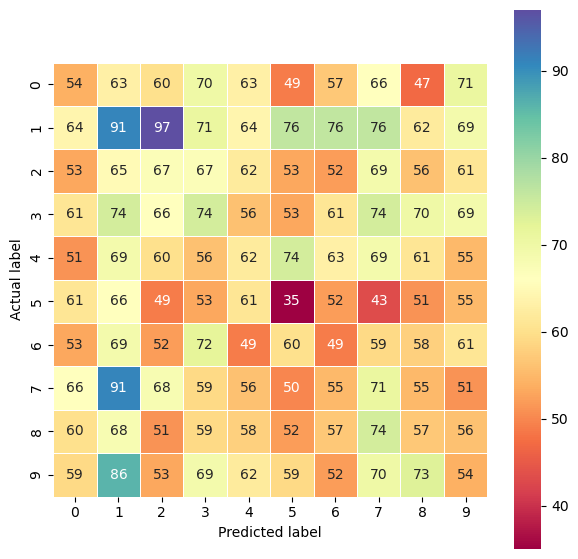

In [52]:

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (7,7))
sns.heatmap(cm_3,annot = True,linewidths = 0.5,square = True,cmap = 'Spectral')
plt.ylabel("Actual label")
plt.xlabel("Predicted label")

In [53]:
#precision,recall, f1_score, accuracy from scratch
def regression_metrics(y,y_pred):
    y= np.array(y)
    y_pred=np.array(y_pred)
    tp,tn,fp,fn = 0,0,0,0
    for j in np.unique(y):
        for i in range(len(y)):
            if y[i]==j and y_pred[i]==j:
                tp+=1
            elif y[i]==j and y_pred[i]!=j:
                fn+=1
            elif y[i]!=j and y_pred[i]==j:
                fp+=1
            elif y[i]!=j and y_pred[i]!=j:
                tn+=1
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    f1_score = 2*precision*recall/(precision+recall)
    return f"f1_score = {f1_score}, recall = {recall}, precision = {precision}" 
regression_metrics(y_test,y_pred)

'f1_score = 0.8705238095238095, recall = 0.8705238095238095, precision = 0.8705238095238095'

In [54]:
from sklearn import metrics
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      2077
           1       0.94      0.96      0.95      2385
           2       0.86      0.86      0.86      2115
           3       0.84      0.81      0.83      2117
           4       0.86      0.86      0.86      2004
           5       0.81      0.82      0.82      1900
           6       0.88      0.90      0.89      2045
           7       0.90      0.90      0.90      2189
           8       0.84      0.81      0.82      2042
           9       0.84      0.83      0.83      2126

    accuracy                           0.87     21000
   macro avg       0.87      0.87      0.87     21000
weighted avg       0.87      0.87      0.87     21000



[Text(0.4691336743772242, 0.9545454545454546, 'x[461] <= 1.5\nlog_loss = 3.32\nsamples = 49000\nvalue = [4826, 5492, 4875, 5024, 4820, 4413, 4831, 5104, 4783\n4832]'),
 Text(0.21343972419928825, 0.8636363636363636, 'x[378] <= 9.5\nlog_loss = 2.882\nsamples = 19127\nvalue = [4664, 173, 716, 3483, 753, 2704, 1213, 3433, 452\n1536]'),
 Text(0.10577179715302491, 0.7727272727272727, 'x[597] <= 2.5\nlog_loss = 2.154\nsamples = 10009\nvalue = [4384, 24, 428, 264, 213, 464, 724, 3222, 14, 272]'),
 Text(0.05062277580071174, 0.6818181818181818, 'x[514] <= 4.5\nlog_loss = 1.802\nsamples = 4631\nvalue = [373, 8, 90, 46, 201, 134, 456, 3060, 10, 253]'),
 Text(0.029626334519572955, 0.5909090909090909, 'x[623] <= 16.5\nlog_loss = 0.982\nsamples = 3515\nvalue = [147, 8, 38, 36, 67, 78, 22, 3009, 4, 106]'),
 Text(0.019217081850533807, 0.5, 'x[433] <= 2.5\nlog_loss = 0.715\nsamples = 3328\nvalue = [14, 8, 36, 19, 67, 45, 22, 3007, 4, 106]'),
 Text(0.010854092526690392, 0.4090909090909091, 'x[153] <= 11.

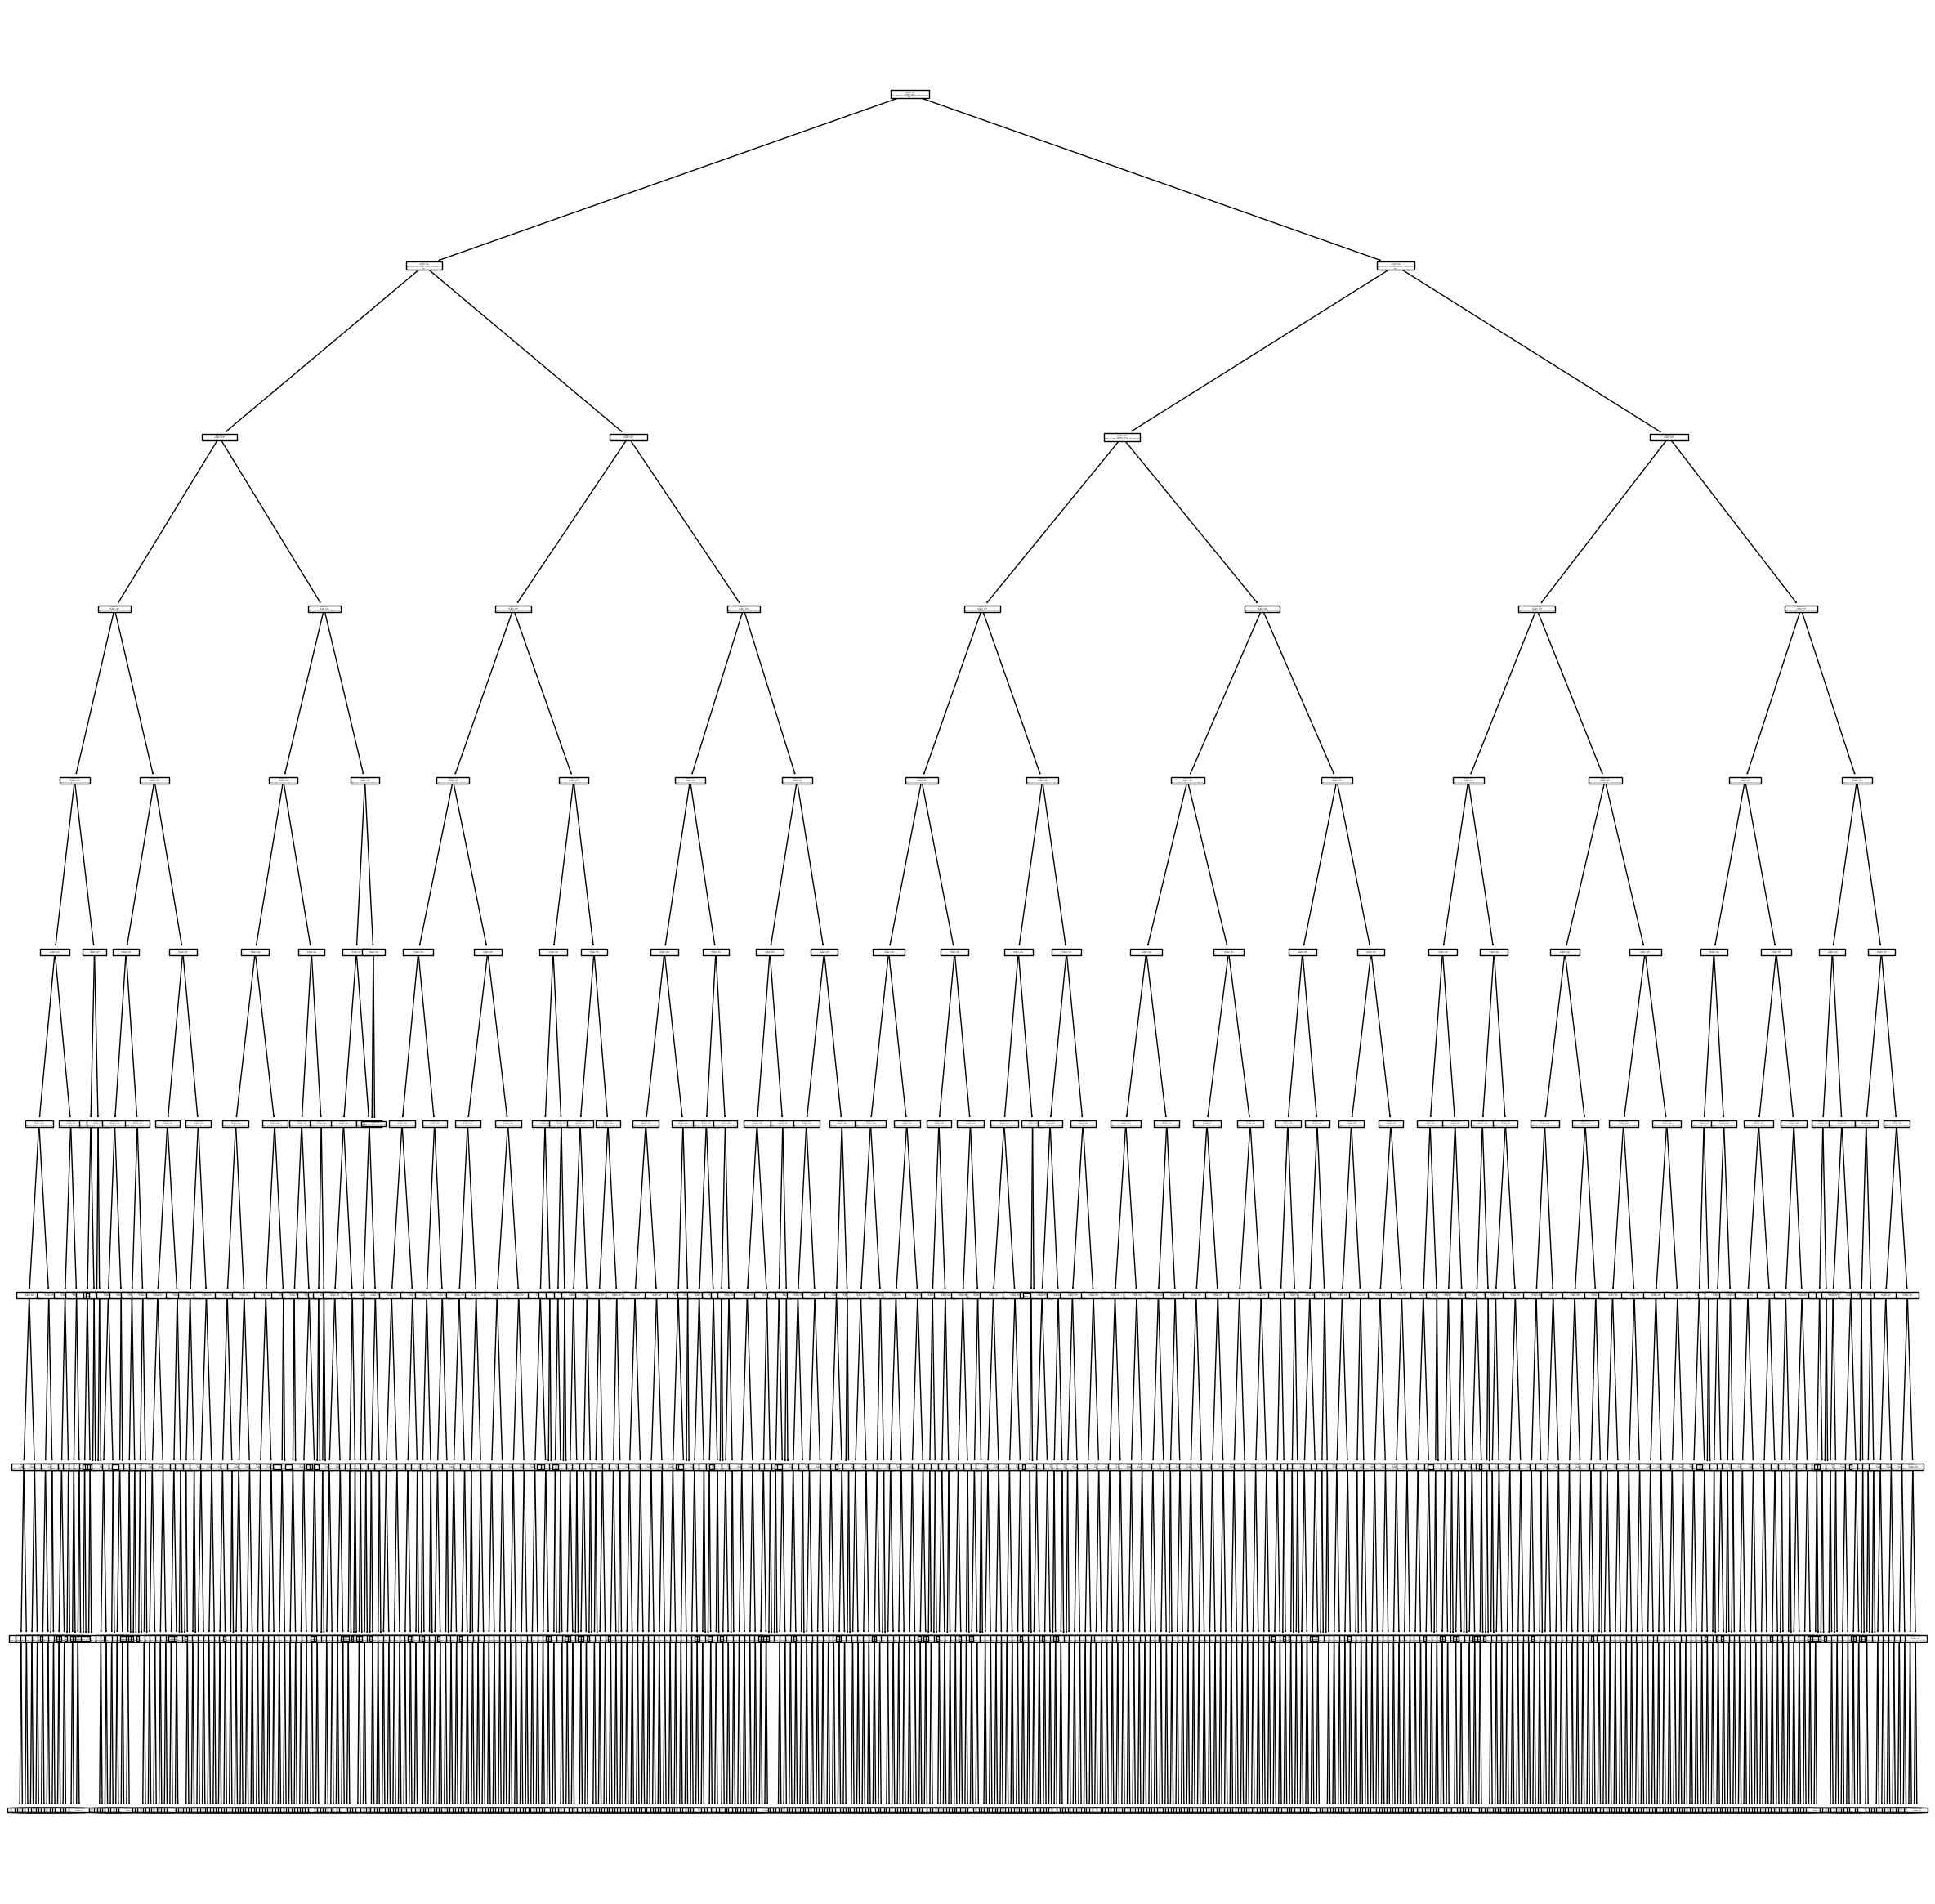

In [55]:
#plot the decision tree
from sklearn import tree
plt.figure(figsize = (30,30))
tree.plot_tree(clf_logloss_1)

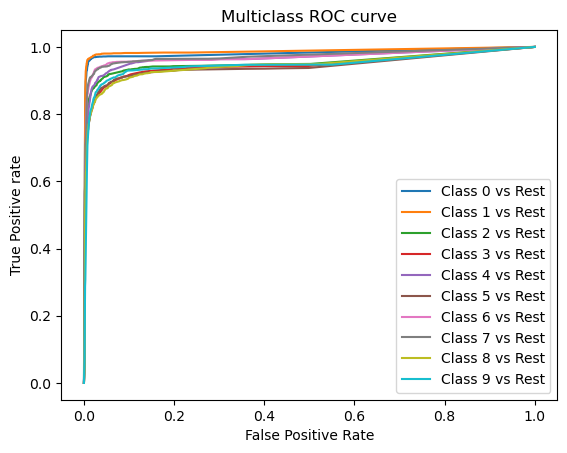

In [59]:
#plot of auc roc curve
from sklearn.metrics import roc_curve
y_test_int = np.array(y_test,dtype = 'int')
pred_prob = clf_logloss_1.predict_proba(x_test)
fpr = {}
tpr = {}
thresh ={}

n_class = 10

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_int, pred_prob[:,i], pos_label=i)
# plotting
for i in range(n_class):
    plt.plot(fpr[i], tpr[i], linestyle='-',label=f'Class {i} vs Rest')

plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')